In [2]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
file = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
file['Variety'] = iris.target

In [10]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
# Where 0 is setosa 1 is versicolor and 2 is verginica

In [19]:
file["Category"] = file.Variety.apply(lambda x : iris.target_names[x])

In [20]:
file

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Variety,Category
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [21]:
X = file.drop(['Variety', 'Category'], axis = 'columns')

In [22]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
Y = file.Variety

In [26]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Variety, Length: 150, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)

In [29]:
len(train_X)

120

In [30]:
len(test_X)

30

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model = RandomForestClassifier(n_estimators = 80)

In [54]:
model.fit(train_X, train_Y)

RandomForestClassifier(n_estimators=80)

In [55]:
model.score(test_X, test_Y)

0.9

In [58]:
predicted_Y = model.predict(test_X)

In [60]:
test_Y.head()

37     0
102    2
11     0
32     0
78     1
Name: Variety, dtype: int32

In [65]:
predicted_Y

array([0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 0])

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cm = confusion_matrix(test_Y, predicted_Y)

In [70]:
cm

array([[13,  0,  0],
       [ 0,  6,  1],
       [ 0,  2,  8]], dtype=int64)

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

<Axes: >

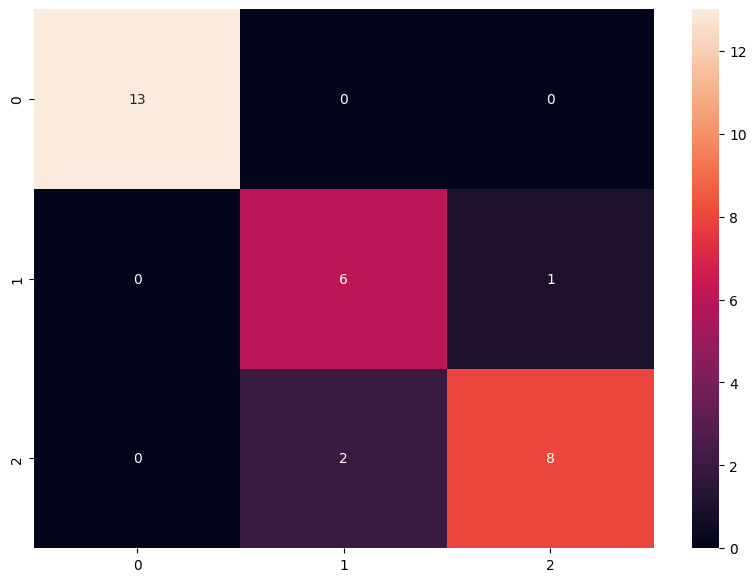

In [73]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True)

In [76]:
train_X, test_X, train_Y, test_Y = train_test_split(X, file.Category, test_size=0.2)

In [77]:
len(train_X)

120

In [78]:
len(test_X)

30

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model = RandomForestClassifier()

In [81]:
model.fit(train_X, train_Y)

RandomForestClassifier()

In [82]:
model.predict(test_X)

array(['virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor'], dtype=object)

In [83]:
test_Y

122     virginica
57     versicolor
145     virginica
26         setosa
102     virginica
107     virginica
115     virginica
32         setosa
114     virginica
60     versicolor
79     versicolor
90     versicolor
50     versicolor
144     virginica
68     versicolor
47         setosa
29         setosa
53     versicolor
24         setosa
104     virginica
87     versicolor
110     virginica
120     virginica
146     virginica
138     virginica
12         setosa
137     virginica
81     versicolor
129     virginica
59     versicolor
Name: Category, dtype: object

In [84]:
model.score(test_X, test_Y)

1.0

In [86]:
from sklearn.metrics import confusion_matrix

In [88]:
y_predicted = model.predict(test_X)

In [89]:
cm = confusion_matrix(test_Y, y_predicted)

In [90]:
cm

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 14]], dtype=int64)

In [91]:
import seaborn as sn

<Axes: >

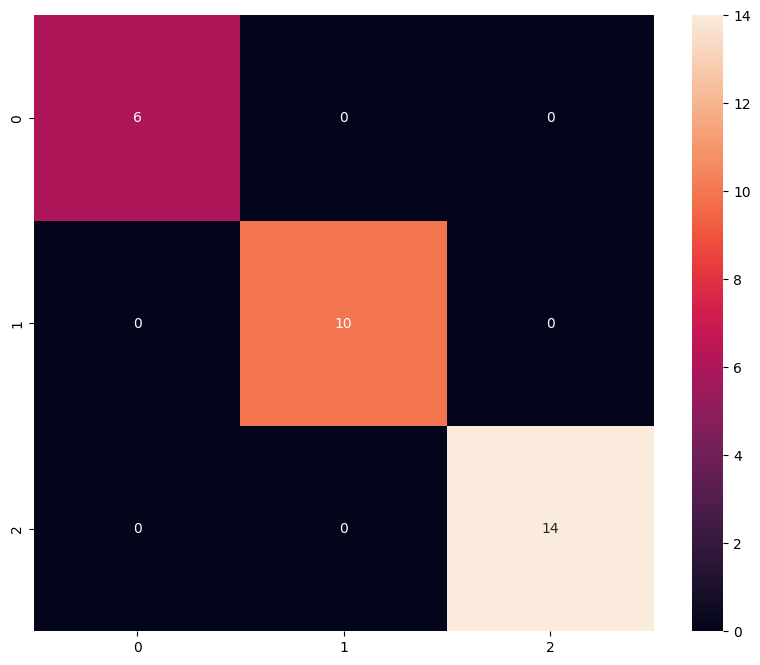

In [94]:
plt.figure(figsize=(10, 8))
sn.heatmap(cm, annot = True)